<a href="https://colab.research.google.com/github/Pickase/Skin-Disease/blob/main/DermatologySkinDisorderRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PRCP - 1027 - Skin Disorder Classification

### Problem Statement

Task 1: Prepare a complete data analysis report on the given data.

Task 2: Create a predictive model using machine learning techniques to predict the various classes of skin disease.

Task3: Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

### Dataset Information

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences.

The diseases in this group are psoriasis(1), seboreic dermatitis(2), lichen planus(3), pityriasis rosea(4), cronic dermatitis(5), and pityriasis rubra pilaris(6).

(Histopathology:The study of diseased cells and tissues using a microscope.)

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well.

Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

The age feature simply represents the age of the patient.

Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

The names and id numbers of the patients were recently removed from the database.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import plotly.express as px

In [ ]:
sd=pd.read_csv('dermatology.csv')
sd.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [ ]:
print('Shape of dataset is ',sd.shape)
sd.info()

Shape of dataset is  (366, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history     

## Attribute Information: 

### Clinical Attributes:
1. **Erythema** - A skin reaction that can be triggered by an infection or some medicines.
2. **Scaling** - The loss of the outer layer of the epidermis in large, scale-like flakes
3. **Definite Borders** - Border description of skin lesions, i.e, areas of  skin that are different from the skin around them.
4. **itching** - Of, relating to, or characterized by an irritating sensation of the skin.
5. **Koebner Phenomenon** -  Also called the Koebner response or the isomorphic response,  is the appearance of skin lesions on lines of trauma.(Source - Wikipedia)
6. **Polygonal Papules** - A papule is a small, well-defined bump in the skin. It may have a rounded, pointed or flat top.
7. **Follicular Papules** - Individual papules that include a central hair follicle. (Source -USA National Centre of Biotechnology Information)

8. **Oral mucosal involvement** -Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. (Source -USA National Centre of Biotechnology Information)

9. **Knee and elbow involvement** - Skin complexities on knee and elbow
10. **Scalp involvement** - Skin complexities on scalp
11. **Family history, (0 or 1)** - If any of these diseases has been observed in the family.
12. **Age**

### Histopathological Attributes:

1. **Melanin_incontinence** - Pigmentary incontinence, which is a phenomenon observed in some inflammatory skin disorders. Clinically it may be seen as a slate-colored pigmentation. Histologically it is seen as an accumulation of melanin in the upper dermis (Source -USA National Centre of Biotechnology Information).
2. **Eosinophils in the infiltrate** - Eosinophils are a kind of white blood cell that helps fight disease. Eosinophil infiltration is a common finding in a broad spectrum of skin diseases, despite the fact that the skin is devoid of eosinophils under physiologic conditions.(Source -USA National Centre of Biotechnology Information).
3. **PNL infiltrate** - Pure Neuritic Leprosy(PNL) Infiltrate.
4. **Fibrosis of the papillary dermis** - Overgrowth, hardening, and/or scarring of various tissues and  excess deposition of extracellular matrix components including collagen in the thin top layer of the dermis (the inner layer of the skin), i.e, papillary dermis.(Source -USA National Centre of Biotechnology Information).
5. **Exocytosis** -  Exocytosis is infiltration of the epidermis by inflammatory or circulating blood cells. Pathological changes may arise in epidermis, dermis and/or subcutaneous tissue (tissues under the skin).
6. **Acanthosis** - A skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. 
7. **Hyperkeratosis** - The increased thickness of the stratum corneum, the outer layer of the skin. Stratum corneum is composed of multiple layers of keratinocyte bodies that, during maturation, produced keratin and subsequently have lost their nucleus and cytoplasmic organelles.
8. **Parakeratosis** - Incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis.
9. **Clubbing of the rete ridges** - Rete ridges are the epithelial extensions that project into the underlying connective tissue in both skin and mucous membranes.
10. **Elongation of the rete ridges** - Mechanical stretching stimulates growth of the basal layer and rete ridges in the epidermis.
11. **Thinning_of_the_suprapapillary_epidermis** -  A thinning of the granular layer at the tips of the papillae.
12. **Spongiform_pustule** - Pustular psoriasis which is microscopically manifested as characteristic spongiform pustule.
13. **Munro_microabcess** - One of the characteristic histological features of early psoriasis vulgaris
14. **Focal_hypergranulosis** An increased thickness of the stratum granulosum.
15. **Disappearance_of_the_granular_layer** - Degeneration of granular layer in Cerebellum.
16. **Vacuolisation_and_damage_of_basal_layer** - presence of vacuolisation and damage of skin basal layer.
17. **Spongiosis** - presence of intercellular edema
18. **Saw-tooth_appearance_of_retes** - appearance of saw tooth patterns under the skin tissue.
19. **Follicular_horn_plug** - presence of follicular horn plugs
20. **Perifollicular_parakeratosis** -  keratinization characterized by the retention of nuclei in tissues surrounding skin follicles.
21. **Inflammatory_monoluclear_inflitrate** - increase in the number of infiltrating mononuclear cells in the skin.
22. **Band-like_infiltrate** - basal epidermis in a banded pattern.

### Class of Diseases
The diseases in this group are

1. **Psoriasis**,
2. **Seboreic Dermatitis**,
3. **Lichen Planus**,
4. **Pityriasis Rosea**,
5. **Cronic Dermatitis**,
6. **Pityriasis Rubra Pilaris**.

In [ ]:
sd.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [ ]:
sd.describe(include='O')

,Age
count,366
unique,61
top,40
freq,17


In [ ]:
for column in sd.columns:
    sd[column]=pd.to_numeric(sd[column], errors='coerce')

In [ ]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [ ]:
sd['family_history'].replace([0,1], ["Not Observed", "Observed"], inplace=True)
sd['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea','Cronic Dermatitis','Pityriasis rubra pilaris'], inplace=True)

In [ ]:
# Replace using median 
median = sd['Age'].median()
sd['Age'].fillna(median, inplace=True)
sd['Age'] = sd['Age'].replace(0,sd['Age'].median())

In [ ]:
sdc=sd.copy()

In [ ]:
sdc.drop(columns=['Age'])
sdc.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,Not Observed,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,Seboreic Dermatitis
1,3,3,3,2,1,0,0,0,1,1,Observed,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,Psoriasis
2,2,1,2,3,1,3,0,3,0,0,Not Observed,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,Lichen Planus
3,2,2,2,0,0,0,0,0,3,2,Not Observed,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,Psoriasis
4,2,3,2,2,2,2,0,2,0,0,Not Observed,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,Lichen Planus


In [ ]:
sdc.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age', 'Class']
#Histopathological Attributes
sdcHA=sdc[['melanin incontinence','eosinophils in the infiltrate', 'PNL infiltrate','fibrosis of the papillary dermis', 'exocytosis', 'acanthosis','hyperkeratosis', 'parakeratosis', 'dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis', 'spongiform pustule','munro microabcess', 'focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer', 'spongiosis','saw-tooth appearance of retes', 'follicular horn plug','perifollicular parakeratosis', 'inflammatory monoluclear inflitrate','band-like infiltrate']]
#Clinical data for patients
sdcC=sdc[['erythema', 'scaling', 'definite borders', 'itching','koebner phenomenon', 'polygonal papules', 'follicular papules','oral mucosal involvement', 'knee and elbow involvement','scalp involvement', 'family history']]

In [ ]:
sd.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age', 'Class']
#Histopathological Attributes
sdHA=sdc[['melanin incontinence','eosinophils in the infiltrate', 'PNL infiltrate','fibrosis of the papillary dermis', 'exocytosis', 'acanthosis','hyperkeratosis', 'parakeratosis', 'dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis', 'spongiform pustule','munro microabcess', 'focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer', 'spongiosis','saw-tooth appearance of retes', 'follicular horn plug','perifollicular parakeratosis', 'inflammatory monoluclear inflitrate','band-like infiltrate']]
#Clinical data for patients
sdC=sdc[['erythema', 'scaling', 'definite borders', 'itching','koebner phenomenon', 'polygonal papules', 'follicular papules','oral mucosal involvement', 'knee and elbow involvement','scalp involvement', 'family history']]

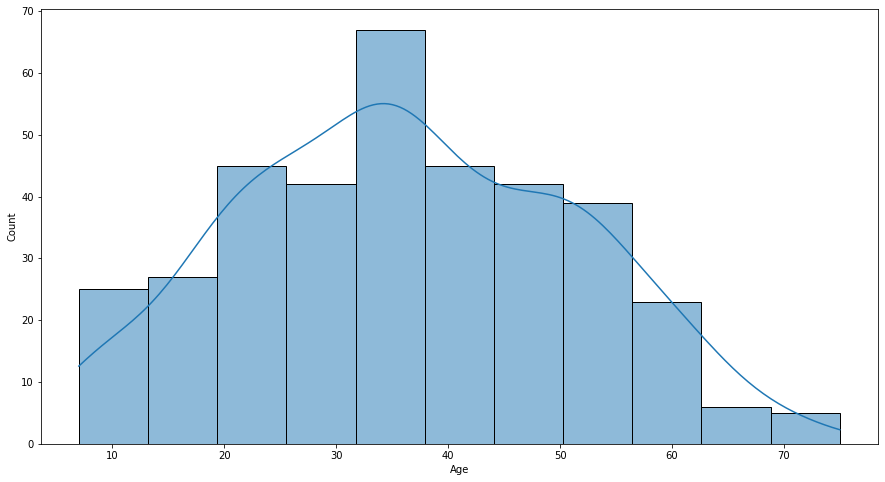

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(sd['Age'],kde=True)
plt.show()

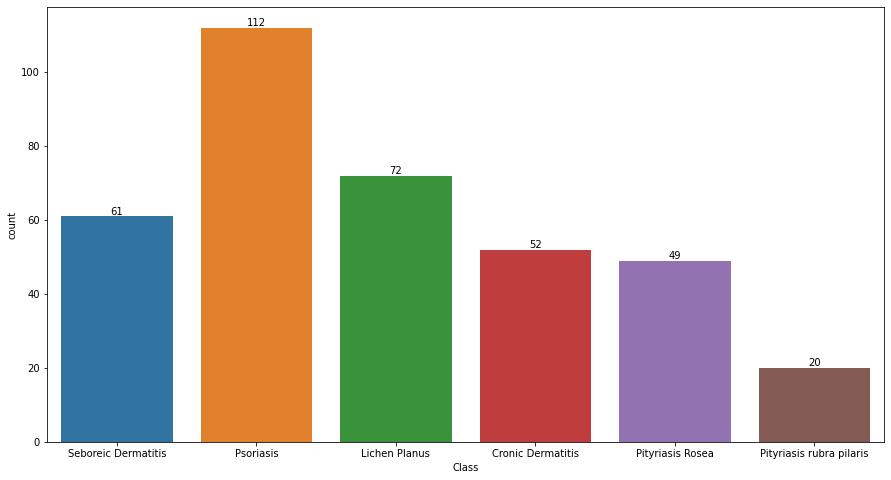

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x=sd["Class"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

<Figure size 1080x432 with 0 Axes>

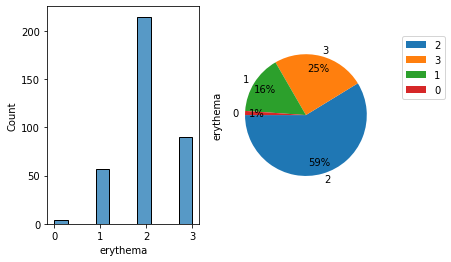

<Figure size 1080x432 with 0 Axes>

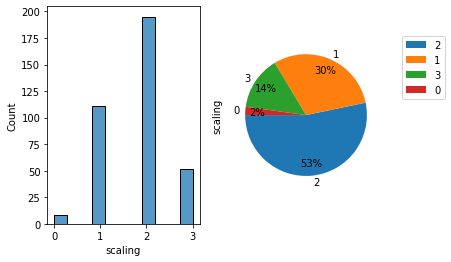

<Figure size 1080x432 with 0 Axes>

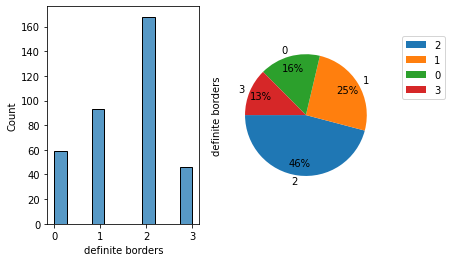

<Figure size 1080x432 with 0 Axes>

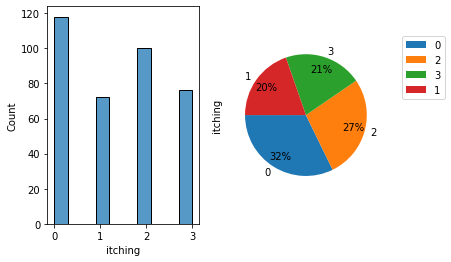

<Figure size 1080x432 with 0 Axes>

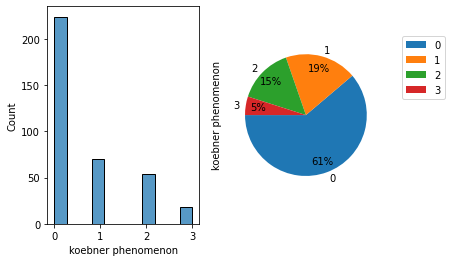

<Figure size 1080x432 with 0 Axes>

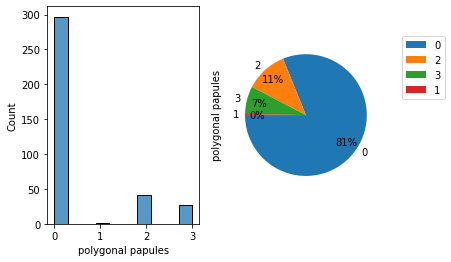

<Figure size 1080x432 with 0 Axes>

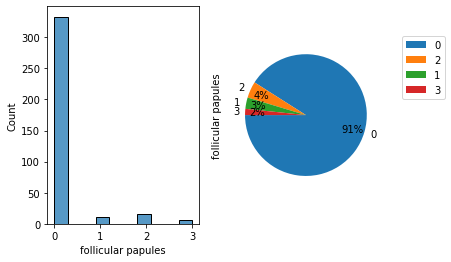

<Figure size 1080x432 with 0 Axes>

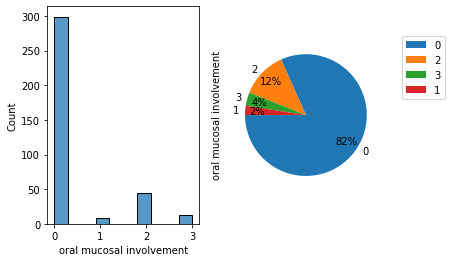

<Figure size 1080x432 with 0 Axes>

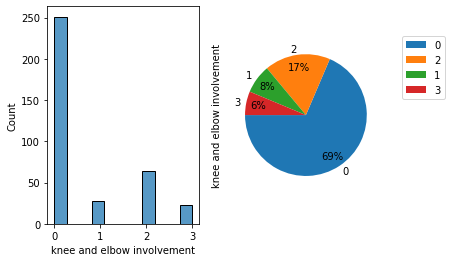

<Figure size 1080x432 with 0 Axes>

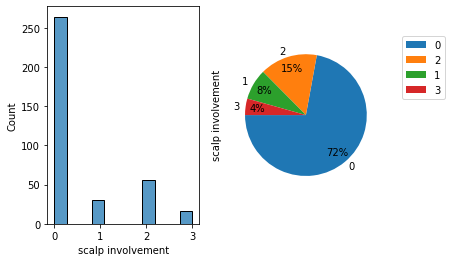

<Figure size 1080x432 with 0 Axes>

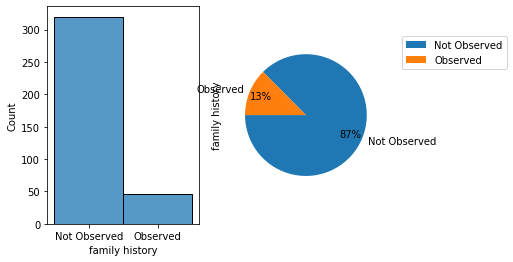

In [ ]:
for col in sdcC:
    plt.figure(figsize=(15,6))
    plt.tight_layout()
    f,(axhist,axpie)=plt.subplots(1,2)
    sns.histplot(x=sdc[col],ax=axhist)
    sdc[col].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=180,radius=1.0,pctdistance=0.80)
    plt.legend(bbox_to_anchor=(1.1,1.05))
    plt.show()

<Figure size 1080x432 with 0 Axes>

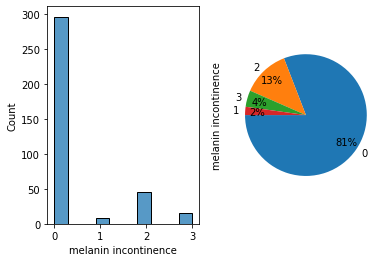

<Figure size 1080x432 with 0 Axes>

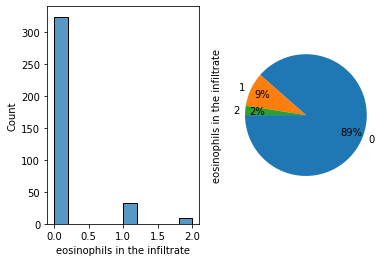

<Figure size 1080x432 with 0 Axes>

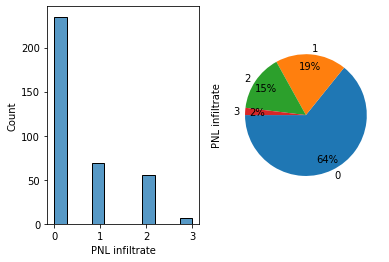

<Figure size 1080x432 with 0 Axes>

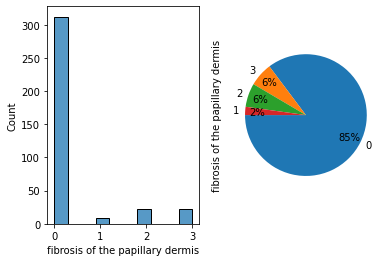

<Figure size 1080x432 with 0 Axes>

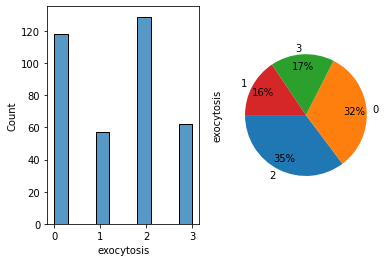

<Figure size 1080x432 with 0 Axes>

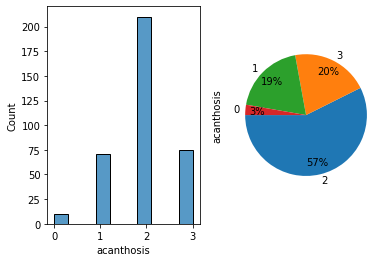

<Figure size 1080x432 with 0 Axes>

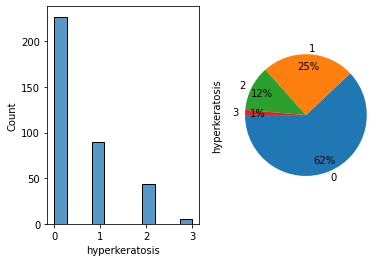

<Figure size 1080x432 with 0 Axes>

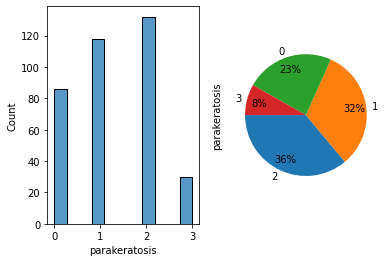

<Figure size 1080x432 with 0 Axes>

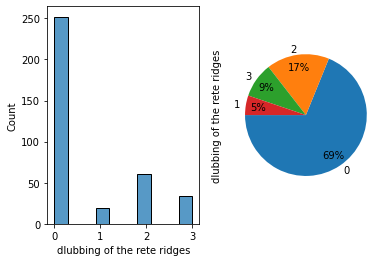

<Figure size 1080x432 with 0 Axes>

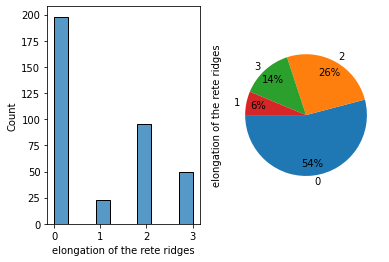

<Figure size 1080x432 with 0 Axes>

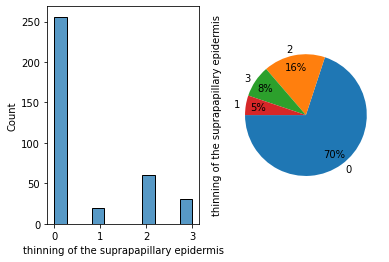

<Figure size 1080x432 with 0 Axes>

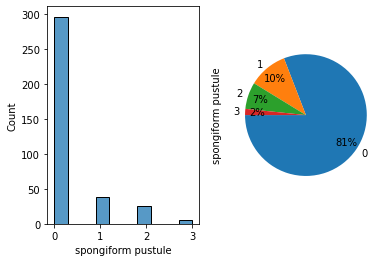

<Figure size 1080x432 with 0 Axes>

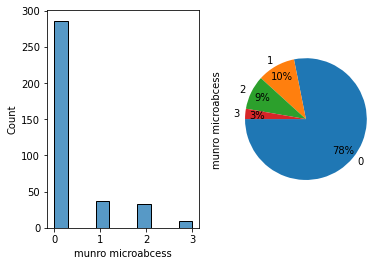

<Figure size 1080x432 with 0 Axes>

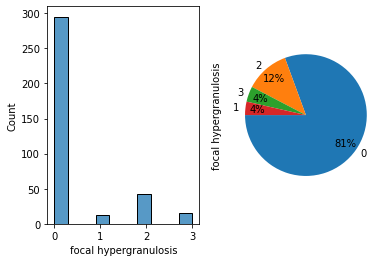

<Figure size 1080x432 with 0 Axes>

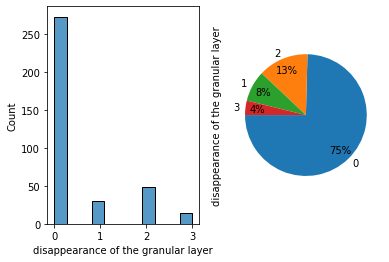

<Figure size 1080x432 with 0 Axes>

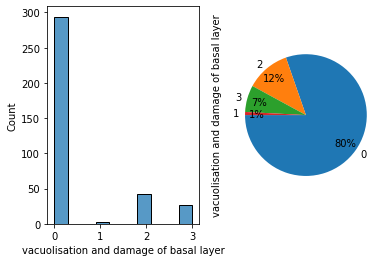

<Figure size 1080x432 with 0 Axes>

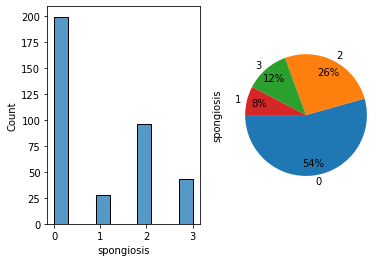

<Figure size 1080x432 with 0 Axes>

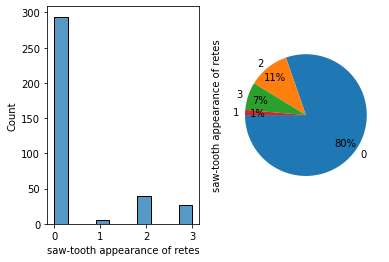

<Figure size 1080x432 with 0 Axes>

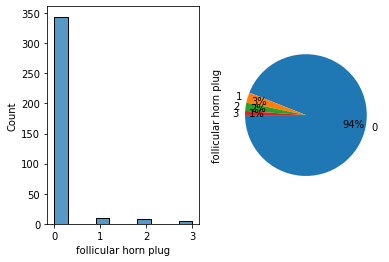

<Figure size 1080x432 with 0 Axes>

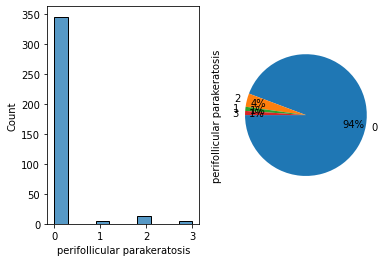

<Figure size 1080x432 with 0 Axes>

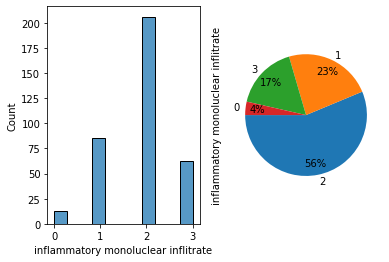

<Figure size 1080x432 with 0 Axes>

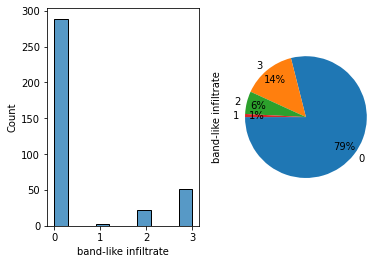

In [ ]:
for col in sdcHA:
    plt.figure(figsize=(15,6))
    plt.tight_layout()
    f,(axhist,axpie)=plt.subplots(1,2)
    sns.histplot(x=sdcHA[col],ax=axhist)
    sdcHA[col].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=180,radius=1.0,pctdistance=0.8)
    plt.show()

In [ ]:
sd.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age', 'Class']

In [ ]:
#Histopathological Attributes
sdHA=sd[['melanin incontinence','eosinophils in the infiltrate', 'PNL infiltrate','fibrosis of the papillary dermis', 'exocytosis', 'acanthosis','hyperkeratosis', 'parakeratosis', 'dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis', 'spongiform pustule','munro microabcess', 'focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer', 'spongiosis','saw-tooth appearance of retes', 'follicular horn plug','perifollicular parakeratosis', 'inflammatory monoluclear inflitrate','band-like infiltrate']]
#Clinical data for patients
sdC=sd[['erythema', 'scaling', 'definite borders', 'itching','koebner phenomenon', 'polygonal papules', 'follicular papules','oral mucosal involvement', 'knee and elbow involvement','scalp involvement', 'family history']]

### One Hot Encoding Family History

In [ ]:
sd=pd.get_dummies(sd,columns=['family history'])

In [ ]:
sd.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'dlubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'Class', 'family history_Not Observed',
       'family history_Observed'],
      dtype='obje

### Feature Scaling

In [ ]:
sdMMS=MinMaxScaler()
sd['Age']=sdMMS.fit_transform(sd[['Age']])

### Model Building

### Train Test Split

In [ ]:
sdX=sd.drop(columns=['Class'])
sdy=sd['Class']

In [ ]:
sdXtr,sdXte,sdytr,sdyte=train_test_split(sdX,sdy,test_size=0.3,random_state=1)

In [ ]:
print("The shape of X Train is:", sdXtr.shape)
print("The shape of X Test is:", sdXtr.shape)
print("The shape of Y Train is:", sdytr.shape)
print("The shape of Y Test is:", sdyte.shape)

The shape of X Train is: (256, 35)
The shape of X Test is: (256, 35)
The shape of Y Train is: (256,)
The shape of Y Test is: (110,)


## 1.Logistic Regression Model

In [ ]:
sdlrmodel=LogisticRegression()
sdlrmodel.fit(sdXtr,sdytr)
sdXtelr=sdlrmodel.predict(sdXte)
sdXtrlr=sdlrmodel.predict(sdXtr)
sdXtrlraccu=accuracy_score(sdytr,sdXtrlr)
sdXtelraccu=accuracy_score(sdyte,sdXtelr)
print('Train Accuracy:',(sdXtrlraccu*100))
print('Test Accuracy:',(sdXtelraccu*100))
print('Test Score:',classification_report(sdyte,sdXtelr))
print('Train Score:',classification_report(sdytr,sdXtrlr))

Train Accuracy: 99.609375
Test Accuracy: 98.18181818181819
Test Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       1.00      0.88      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.90      1.00      0.95        19

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110

Train Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       0.97      1.00      0.9

In [ ]:
sdlrrmodel=LogisticRegression(C=1,penalty='l2',solver='liblinear')
sdlrrmodel.fit(sdXtr,sdytr)
sdXtelrr=sdlrrmodel.predict(sdXte)
sdXtrlrr=sdlrmodel.predict(sdXtr)
sdXtrlrraccu=accuracy_score(sdytr,sdXtrlrr)
sdXtelrraccu=accuracy_score(sdyte,sdXtelrr)
print('Train Accuracy:',(sdXtrlrraccu*100))
print('Test Accuracy:',(sdXtelrraccu*100))
print('Test Score:',classification_report(sdyte,sdXtelr))
print('Train Score:',classification_report(sdytr,sdXtrlr))

Train Accuracy: 99.609375
Test Accuracy: 98.18181818181819
Test Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       1.00      0.88      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.90      1.00      0.95        19

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110

Train Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       0.97      1.00      0.9

## 2.Random Forest Classifier

In [ ]:
sdrfrmodel=RandomForestClassifier(n_estimators=200,max_features='auto')
sdrfrmodel.fit(sdXtr,sdytr)
sdXterfr=sdrfrmodel.predict(sdXte)
sdXtrrfr=sdrfrmodel.predict(sdXtr)
sdrfrmodel.fit(sdXtr,sdytr)
sdXtrrfraccu=accuracy_score(sdytr,sdXtrrfr)
sdXterfraccu=accuracy_score(sdyte,sdXterfr)
print('Accuracy:',(sdXtrrfraccu*100))
print('Accuracy:',(sdXterfraccu*100))
print('Test Score:',classification_report(sdyte,sdXterfr))
print('Train Score:',classification_report(sdytr,sdXtrrfr))

Accuracy: 100.0
Accuracy: 97.27272727272728
Test Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.89      0.94      0.91        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.94      0.89      0.92        19

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110

Train Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       1.00      1.00      1.00        32
Pit

## 3.SVM

In [ ]:
sdsvcmodel=SVC(C=1,gamma='scale',kernel='linear')
sdsvcmodel.fit(sdXtr,sdytr)
sdXtesvc=sdsvcmodel.predict(sdXte)
sdXtrsvc=sdsvcmodel.predict(sdXtr)
sdXtrsvcaccu=accuracy_score(sdytr,sdXtrsvc)
sdXtesvcaccu=accuracy_score(sdyte,sdXtesvc)
print('Train Accuracy:',(sdXtrsvcaccu*100))
print('Test Accuracy:',(sdXtesvcaccu*100))
print('Test Score:',classification_report(sdyte,sdXtesvc))
print('Train Score:',classification_report(sdytr,sdXtrsvc))

Train Accuracy: 100.0
Test Accuracy: 98.18181818181819
Test Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.94      0.94      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.95      0.95      0.95        19

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110

Train Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       1.00      1.00      1.00   

##  4.Decision Tree Classifier

In [ ]:
sddtmodel=DecisionTreeClassifier(criterion='gini',max_features='auto',splitter='best',random_state=39)
sddtmodel.fit(sdXtr,sdytr)
sdXtedt=sddtmodel.predict(sdXte)
sdXtrdt=sddtmodel.predict(sdXtr)
sdXtrdtaccu=accuracy_score(sdytr,sdXtrdt)
sdXtedtaccu=accuracy_score(sdyte,sdXtedt)
print('Train Accuracy:',(sdXtrdtaccu*100))
print('Test Accuracy:',(sdXtedtaccu*100))
print('Test Score:',classification_report(sdyte,sdXtedt))
print('Train Score:',classification_report(sdytr,sdXtrdt))

Train Accuracy: 100.0
Test Accuracy: 97.27272727272728
Test Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       0.93      1.00      0.96        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       1.00      0.88      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.90      0.95      0.92        19

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110

Train Score:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       1.00      1.00      1.00   

## 5.K-Neighbors Classifier

In [ ]:
sdknnmodel=KNeighborsClassifier()
sdknnmodel.fit(sdXtr,sdytr)
sdXteknn=sdknnmodel.predict(sdXte)
sdXtrknn=sdknnmodel.predict(sdXtr)
sdXtrknnaccu=accuracy_score(sdytr,sdXtrknn)
sdXteknnaccu=accuracy_score(sdyte,sdXteknn)
print('Train Accuracy:',(sdXtrknnaccu*100))
print('Test Accuracy:',(sdXteknnaccu*100))
print('Test Report:',classification_report(sdyte,sdXteknn))
print('Train Report:',classification_report(sdytr,sdXtrknn))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXteknn))
print('Train Confusion Matrix:',confusion_matrix(sdytr,sdXtrknn))

Train Accuracy: 98.4375
Test Accuracy: 96.36363636363636
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.81      1.00      0.89        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       1.00      0.79      0.88        19

                accuracy                           0.96       110
               macro avg       0.97      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       0.91      0.97      0.9

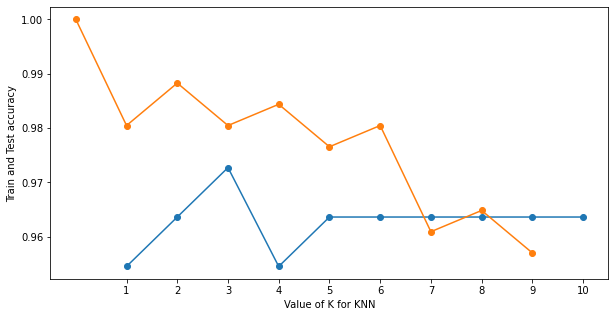

In [ ]:
sdkrange=list(range(1,11))
testscores=[]
trainscores=[]
for k in sdkrange:
    sdknnk=KNeighborsClassifier(n_neighbors=k)
    sdknnk.fit(sdXtr,sdytr)
    sdknnkpte=sdknnk.predict(sdXte)
    sdknnkptr=sdknnk.predict(sdXtr)
    testscores.append(accuracy_score(sdyte,sdknnkpte))
    trainscores.append(accuracy_score(sdytr,sdknnkptr))
plt.figure(figsize=(10,5))
plt.plot(sdkrange,testscores,trainscores,marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Train and Test accuracy')
plt.xticks(range(1,11,1))
plt.show()

Text(0, 0.5, 'Error Rate')

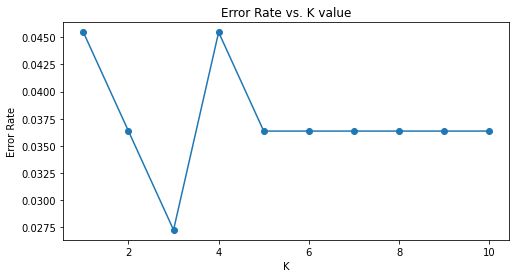

In [ ]:
errt=[]
for i in range(1,11):
    sdknnkkmodel=KNeighborsClassifier(n_neighbors=i)
    sdknnkkmodel.fit(sdXtr,sdytr)
    sdknnpredi=sdknnkkmodel.predict(sdXte)
    errt.append(np.mean(sdknnpredi!=sdyte))
plt.figure(figsize=(8,4))
plt.plot(range(1,11),errt,marker='o')
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')    

In [ ]:
sdknnmodel=KNeighborsClassifier(algorithm='auto',n_neighbors=10,p=1,weights='distance')
sdknnmodel.fit(sdXtr,sdytr)
sdXteknn=sdknnmodel.predict(sdXte)
sdXtrknn=sdknnmodel.predict(sdXtr)
sdXtrknnaccu=accuracy_score(sdytr,sdXtrknn)
sdXteknnaccu=accuracy_score(sdyte,sdXteknn)
print('Train Accuracy:',(sdXtrknnaccu*100))
print('Test Accuracy:',(sdXteknnaccu*100))
print('Test Report:',classification_report(sdyte,sdXteknn))
print('Train Report:',classification_report(sdytr,sdXtrknn))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXteknn))
print('Train Confusion Matrix:',confusion_matrix(sdytr,sdXtrknn))

Train Accuracy: 100.0
Test Accuracy: 98.18181818181819
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.89      1.00      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       1.00      0.89      0.94        19

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       1.00      1.00      1.00 

## 6.LDA

In [ ]:
sdsmote=SMOTE()
sdsmtXtr,sdsmtytr=sdsmote.fit_resample(sdXtr,sdytr)
sdldarmodel=LinearDiscriminantAnalysis()
sdldarmodel.fit(sdsmtXtr,sdsmtytr)
sdXteldar=sdldarmodel.predict(sdXte)
sdXtrldar=sdldarmodel.predict(sdsmtXtr)
sdXtrldaraccu=accuracy_score(sdsmtytr,sdXtrldar)
sdXteldaraccu=accuracy_score(sdyte,sdXteldar)
print('Train Accuracy:',(sdXtrldaraccu*100))
print('Test Accuracy:',(sdXteldaraccu*100))
print('Test Report:',classification_report(sdyte,sdXteldar))
print('Train Report:',classification_report(sdsmtytr,sdXtrldar))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXteldar))
print('Train Confusion Matrix:',confusion_matrix(sdsmtytr,sdXtrldar))

Train Accuracy: 98.48484848484848
Test Accuracy: 96.36363636363636
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.94      0.94      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      0.94      0.97        35
     Seboreic Dermatitis       0.86      0.95      0.90        19

                accuracy                           0.96       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.96      0.96       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        77
           Lichen Planus       1.00      1.00      1.00        77
        Pityriasis Rosea       0.94      0.9

In [ ]:
sdldamodel=LinearDiscriminantAnalysis()
sdldamodel.fit(sdXtr,sdytr)
sdXtelda=sdldamodel.predict(sdXte)
sdXtrlda=sdldamodel.predict(sdXtr)
sdXtrldaaccu=accuracy_score(sdytr,sdXtrlda)
sdXteldaaccu=accuracy_score(sdyte,sdXtelda)
print('Train Accuracy:',(sdXtrldaaccu*100))
print('Test Accuracy:',(sdXteldaaccu*100))
print('Test Report:',classification_report(sdyte,sdXtelda))
print('Train Report:',classification_report(sdytr,sdXtrlda))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXtelda))
print('Train Confusion Matrix:',confusion_matrix(sdytr,sdXtrlda))

Train Accuracy: 98.4375
Test Accuracy: 96.36363636363636
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      0.92      0.96        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.89      0.94      0.91        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      0.97      0.99        35
     Seboreic Dermatitis       0.90      0.95      0.92        19

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       0.94      0.94      0.9

In [ ]:
sdldamodel=LinearDiscriminantAnalysis(n_components=1,shrinkage= 'auto',solver= 'lsqr')
sdldamodel.fit(sdXtr,sdytr)
sdXtelda=sdldamodel.predict(sdXte)
sdXtrlda=sdldamodel.predict(sdXtr)
sdXtrldaaccu=accuracy_score(sdytr,sdXtrlda)
sdXteldaaccu=accuracy_score(sdyte,sdXtelda)
print('Train Accuracy:',(sdXtrldaaccu*100))
print('Test Accuracy:',(sdXteldaaccu*100))
print('Test Report:',classification_report(sdyte,sdXtelda))
print('Train Report:',classification_report(sdytr,sdXtrlda))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXtelda))
print('Train Confusion Matrix:',confusion_matrix(sdytr,sdXtrlda))

Train Accuracy: 97.65625
Test Accuracy: 97.27272727272728
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.89      0.94      0.91        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.94      0.89      0.92        19

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       0.88      0.94      0.

## 7.Gradient Boost Classifiers

In [ ]:
sdgbmodel=GradientBoostingClassifier(criterion='squared_error', loss='deviance', max_features='log2',n_estimators=100)
sdgbmodel.fit(sdXtr,sdytr)
sdXtegb=sdgbmodel.predict(sdXte)
sdXtrgb=sdgbmodel.predict(sdXtr)
sdXtrgbaccu=accuracy_score(sdytr,sdXtrgb)
sdXtegbaccu=accuracy_score(sdyte,sdXtegb)
print('Train Accuracy:',(sdXtrgbaccu*100))
print('Test Accuracy:',(sdXtegbaccu*100))
print('Test Report:',classification_report(sdyte,sdXtegb))
print('Train Report:',classification_report(sdytr,sdXtrgb))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXtegb))
print('Train Confusion Matrix:',confusion_matrix(sdytr,sdXtrgb))

Train Accuracy: 100.0
Test Accuracy: 98.18181818181819
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.94      0.94      0.94        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.95      0.95      0.95        19

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       1.00      1.00      1.00 

## 8.Multinomial Naive Bayes Classifier

In [ ]:
sdmnbmodel=MultinomialNB()
sdmnbmodel.fit(sdXtr,sdytr)
sdXtemnb=sdmnbmodel.predict(sdXte)
sdXtrmnb=sdmnbmodel.predict(sdXtr)
sdXtrmnbaccu=accuracy_score(sdytr,sdXtrmnb)
sdXtemnbaccu=accuracy_score(sdyte,sdXtemnb)
print('Train Accuracy:',(sdXtrmnbaccu*100))
print('Test Accuracy:',(sdXtemnbaccu*100))
print('Test Report:',classification_report(sdyte,sdXtemnb))
print('Train Report:',classification_report(sdytr,sdXtrmnb))
print('Test Confusion Matrix:',confusion_matrix(sdyte,sdXtemnb))
print('Train Confusion Matrix:',confusion_matrix(sdytr,sdXtrmnb))

Train Accuracy: 99.21875
Test Accuracy: 97.27272727272728
Test Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        13
           Lichen Planus       1.00      1.00      1.00        23
        Pityriasis Rosea       0.89      0.94      0.91        17
Pityriasis rubra pilaris       1.00      1.00      1.00         3
               Psoriasis       1.00      1.00      1.00        35
     Seboreic Dermatitis       0.94      0.89      0.92        19

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110

Train Report:                           precision    recall  f1-score   support

       Cronic Dermatitis       1.00      1.00      1.00        39
           Lichen Planus       1.00      1.00      1.00        49
        Pityriasis Rosea       0.94      1.00      0.

## 9.XG Boost Classifier

In [ ]:
le = LabelEncoder()
sdyl= le.fit_transform(sdy)
sdXltr,sdXlte,sdyltr,sdylte= train_test_split(sdX,sdyl, test_size=0.3, random_state=42)

In [ ]:
sdxgbrmodel=XGBClassifier(max_depth=1,n_estimators=300)
sdxgbrmodel.fit(sdXltr,sdyltr)
sdXtexgbr=sdxgbrmodel.predict(sdXlte)
sdXtrxgbr=sdxgbrmodel.predict(sdXltr)
sdXtrxgbraccu=accuracy_score(sdyltr,sdXtrxgbr)
sdXtexgbraccu=accuracy_score(sdylte,sdXtexgbr)
print('Train Accuracy:',(sdXtrxgbraccu*100))
print('Test Accuracy:',(sdXtexgbraccu*100))
print('Test Report:',classification_report(sdylte,sdXtexgbr))
print('Train Report:',classification_report(sdyltr,sdXtrxgbr))
print('Test Confusion Matrix:',confusion_matrix(sdylte,sdXtexgbr))
print('Train Confusion Matrix:',confusion_matrix(sdyltr,sdXtrxgbr))

Train Accuracy: 100.0
Test Accuracy: 96.36363636363636
Test Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       0.92      0.80      0.86        15
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        40
           5       0.83      0.94      0.88        16

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.97      0.96      0.96       110

Train Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00       

## Model Comparison

In [ ]:
sdmodelcomp=pd.DataFrame({'Model':['LR','KNN','SVMC','DTC','RFC(T)', 'MNBC','GBC','XGBC','LDA'],
                         'Train Score':[sdXtrlrraccu,sdXtrknnaccu,sdXtrsvcaccu,sdXtrdtaccu,sdXtrrfraccu,sdXtrmnbaccu,sdXtrgbaccu,sdXtrxgbraccu,sdXtrldaraccu],
                         'Test Score':[sdXtelrraccu,sdXteknnaccu,sdXtesvcaccu,sdXtedtaccu,sdXterfraccu,sdXtemnbaccu,sdXtegbaccu,sdXtexgbraccu,sdXteldaraccu],
                         'Model Name':['Logistic Regressor','KNN Classifier','Support Vectot Machine Classifier','Decision Tree Classifier','Random Forest Classifier(Tuned)', 'Multinomial Naive Bayes Classifier','Gradient Boosting Classifier','XG Boosting Classifier','Linear Discriminant Analysis'],})

In [ ]:
sdmodelcomp.set_index('Model',drop=True,inplace=True)
sdmodelcomp

,Train Score,Test Score,Model Name
Model,,,
LR,0.996094,0.981818,Logistic Regressor
KNN,1.000000,0.981818,KNN Classifier
SVMC,1.000000,0.981818,Support Vectot Machine Classifier
DTC,1.000000,0.972727,Decision Tree Classifier
RFC(T),1.000000,0.972727,Random Forest Classifier(Tuned)
MNBC,0.992188,0.972727,Multinomial Naive Bayes Classifier
GBC,1.000000,0.981818,Gradient Boosting Classifier
XGBC,1.000000,0.963636,XG Boosting Classifier
LDA,0.984848,0.963636,Linear Discriminant Analysis


        Train Score  Test Score                          Model Name
Model                                                              
LR         0.996094    0.981818                  Logistic Regressor
KNN        1.000000    0.981818                      KNN Classifier
SVMC       1.000000    0.981818   Support Vectot Machine Classifier
DTC        1.000000    0.972727            Decision Tree Classifier
RFC(T)     1.000000    0.972727     Random Forest Classifier(Tuned)
MNBC       0.992188    0.972727  Multinomial Naive Bayes Classifier
GBC        1.000000    0.981818        Gradient Boosting Classifier
XGBC       1.000000    0.963636              XG Boosting Classifier
LDA        0.984848    0.963636        Linear Discriminant Analysis


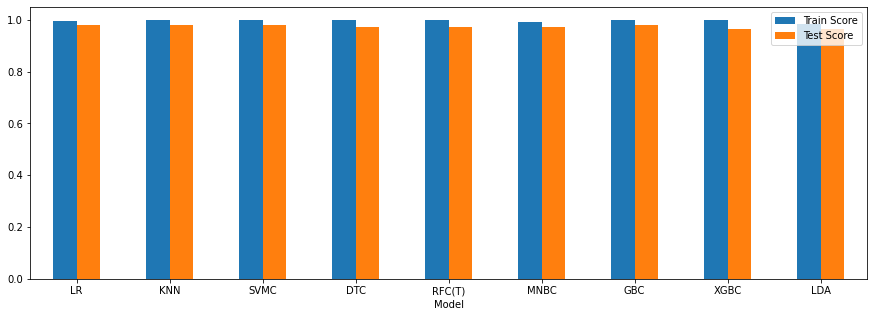

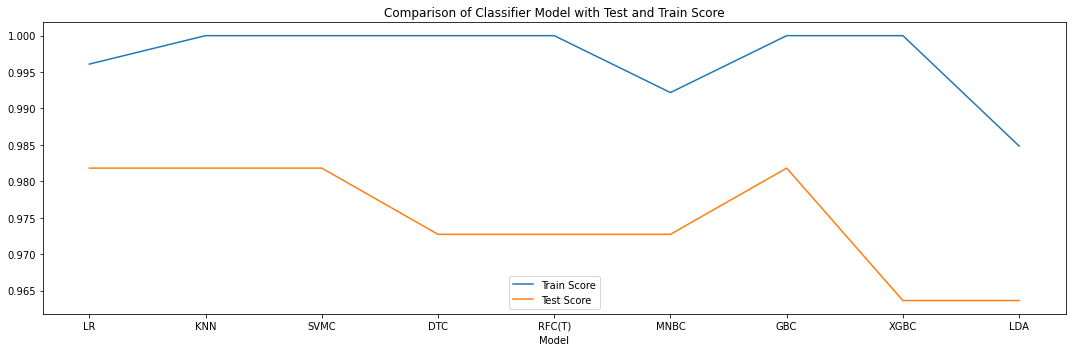

In [ ]:
print(sdmodelcomp)
ax=sdmodelcomp.plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=0)
ax=sdmodelcomp.plot(figsize=(15,5))
plt.title('Comparison of Classifier Model with Test and Train Score')
plt.tight_layout()
plt.legend(loc='lower center')
for i in ax.containers:
    ax.bar_label(i,padding=1.0,fmt="%.2f")